In [ ]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.3 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow_io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 48.1 MB/s eta 0:00:00


In [ ]:
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown 1KR_7-SMuvH0rLmZawqoIZYm6V1mVjHrA

Access denied with the following error:

 	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1KR_7-SMuvH0rLmZawqoIZYm6V1mVjHrA 



In [ ]:
!pip install -U gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt
import imutils
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA, KernelPCA
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_io as tfio
import keras_tuner as kt
import os
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Datasets/data.zip > /dev/null

In [ ]:
dir_cataract ='/content/Untitled Folder/cataract'
dir_normal ='/content/Untitled Folder/normal'
if not os.path.isdir(dir_cataract):
  os.makedirs(dir_cataract)
if not os.path.isdir(dir_normal):
  os.makedirs(dir_normal)
for root, dirs, files in os.walk((os.path.normpath('/content/data/')), topdown=False):
    for name in files:
        SourceFolder = os.path.join(root,name)
        if "normal" in name:
            shutil.move(SourceFolder, dir_normal)
        elif "cataract" in name :
            shutil.move(SourceFolder, dir_cataract)

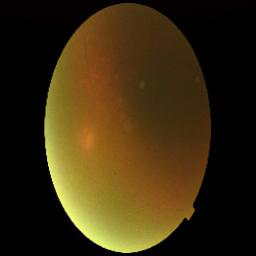

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/data/cataract_100.jpg')
img

In [ ]:
img_height = 256
img_width = 256

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_ds = image_dataset_from_directory('/content/Untitled Folder', 
                                        seed = 7, 
                                        image_size=(img_height, img_width), 
                                        validation_split=0.2, 
                                        subset='training')

Found 2922 files belonging to 2 classes.
Using 2338 files for training.


In [ ]:
val_ds = image_dataset_from_directory('/content/Untitled Folder', 
                                      seed = 7, 
                                      image_size=(img_height, img_width), 
                                      validation_split=0.2, 
                                      subset='validation')

Found 2922 files belonging to 2 classes.
Using 584 files for validation.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
simple_cnn = tf.keras.models.load_model('/content/model.h5')

In [ ]:
# def simpe_cnn():
#   input = keras.Input(shape=(256, 256, 3))
#   x = layers.Rescaling(1.0/255)(input)    
#   x = layers.Conv2D(32,
#                     kernel_size=(3, 3),
#                     activation="relu",
#                     padding='same')(input)
#   x = layers.MaxPooling2D(pool_size=(2, 2))(x)
#   x = layers.Conv2D(32,
#                     kernel_size=(3, 3),
#                     activation="relu",
#                     padding='same')(x)
#   x = layers.MaxPooling2D(pool_size=(2, 2))(x)
#   x = layers.Conv2D(64,
#                     kernel_size=(3, 3),
#                     activation="relu",
#                     padding='same')(x)
#   x = layers.MaxPooling2D(pool_size=(2, 2))(x)
#   x = layers.Conv2D(128,
#                     kernel_size=(3, 3),
#                     activation="relu",
#                     padding='same')(x)
#   x = layers.MaxPooling2D(pool_size=(2, 2))(x)
#   x = layers.Conv2D(256,
#                     kernel_size=(3, 3),
#                     activation="relu",
#                     padding='same')(x)
#   x = layers.MaxPooling2D(pool_size=(2, 2))(x)
#   x = layers.Flatten()(x)
#   x = layers.Dense(256, activation='relu')(x)
#   output = layers.Dense(1, activation="sigmoid")(x)
#   return keras.Model(input, output)

In [ ]:
batch_size = 128
epochs = 10

cnn_model = simpe_cnn()

cnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn_model.fit(
    train_ds,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=val_ds,
)

Epoch 1/10
74/74 [==============================] - 55s 654ms/step - loss: 1.7090 - accuracy: 0.7352 - val_loss: 0.4401 - val_accuracy: 0.7808
Epoch 2/10
74/74 [==============================] - 46s 586ms/step - loss: 0.3468 - accuracy: 0.8516 - val_loss: 0.5095 - val_accuracy: 0.8750
Epoch 3/10
74/74 [==============================] - 51s 645ms/step - loss: 0.2714 - accuracy: 0.8935 - val_loss: 0.4236 - val_accuracy: 0.8870
Epoch 4/10
74/74 [==============================] - 46s 586ms/step - loss: 0.1954 - accuracy: 0.9166 - val_loss: 0.4009 - val_accuracy: 0.8904
Epoch 5/10
74/74 [==============================] - 49s 623ms/step - loss: 0.2068 - accuracy: 0.9217 - val_loss: 0.1879 - val_accuracy: 0.9110
Epoch 6/10
74/74 [==============================] - 46s 584ms/step - loss: 0.1399 - accuracy: 0.9397 - val_loss: 0.1790 - val_accuracy: 0.9195
Epoch 7/10
74/74 [==============================] - 46s 579ms/step - loss: 0.1379 - accuracy: 0.9474 - val_loss: 0.2211 - val_accuracy: 0.8938

In [ ]:
cnn_model.save("model.h5")

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from glob import glob
import pandas as pd

img_size = (256, 256)
d = {0:'cataract', 1:'normal'}

def predict_images(dir='test_images', res_file='result.csv'):

    files = glob(dir+'/*')
    d_test={}
    for file in files:
        image = load_img(file, target_size=img_size)
        image = np.array(image)
        pred = model.predict(np.expand_dims(image, axis=0))[0][0]
        pred = int(np.round(pred))
        d_test[file.split('/')[3]]=d[pred]
    
    d_csv = {'name':list(d_test.keys()), 'label': list(d_test.values())}
    df = pd.DataFrame.from_dict(d_csv)
    print(df)
    return df.to_csv(res_file, index=False)

In [ ]:
!gdown 16epIFeSWcYfcCyFCD6s2ZJrVQC4mKMlx
!unzip test_images.zip

Access denied with the following error:

 	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=16epIFeSWcYfcCyFCD6s2ZJrVQC4mKMlx 

unzip:  cannot find or open test_images.zip, test_images.zip.zip or test_images.zip.ZIP.


In [ ]:
predict_images(dir='/content/test_images', res_file='result.csv')

1/1 [==============================] - 0s 19ms/step
    name     label
0  2.jpg    normal
1  3.jpg    normal
2  1.jpg  cataract
3  4.jpg  cataract


In [ ]:
import numpy as np
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in model.non_trainable_weights])
totalParams = trainableParams + nonTrainableParams

print(trainableParams)
print(nonTrainableParams)
print(totalParams)

8412449
0.0
8412449.0


In [ ]:
import pandas as pd
# result = pd.read_csv('/content/result.csv')
result = pd.DataFrame({'name': ['1.jpg', '2.jpeg', '3.jpeg', '4.jpg'], 'label': ['normal', 'cataract', 'normal', 'cataract']})
# ref = pd.read_csv('/content/ref.csv')
ref = pd.DataFrame({'name': ['1.jpg', '2.jpeg', '3.jpeg', '4.jpg'], 'true_label': ['cataract', 'normal', 'normal', 'cataract']})
merg = pd.merge(ref, result, on='name', how='left')

from sklearn.metrics import classification_report
print(classification_report(y_true=merg.true_label, y_pred=merg.label))